<div style="text-align:center; color:green; font-weight:bold;">
    Data Analysis and Cleaning notebook
</div>  

### Importing Packages

In [61]:
# Importting the pandas library for data handling
import pandas as pd
# to create plots and chart we import the matplotlib library for data visualization
import matplotlib.pyplot as plt

### Reading dataset

In [58]:
# This loads a CSV file named 'books.csv' into a pandas DataFrame
data = pd.read_csv("books.csv") 
# Display the contents of the DataFrame
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


### Data Cleaning

In [60]:
# Now we display a concise summary of the DataFrame 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [14]:
# The column names of the DataFrame 'data'
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [19]:
# This will return the count of null values for each column
data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [20]:
# Verifying if there is duplicate rows in the DataFrame 'data'
data.duplicated().sum()

0

In [21]:
# The author names of the books with ids below are not correct, we have found a mismatch between the information on Goodreads website and the dataframe
bookid = [1068, 38338, 19100]
# we first filter the DataFrame 'data' to include only rows where 'bookID' is in the 'bookid' list
data[data['bookID'].isin(bookid)]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
327,1068,1776,Peter Stone/Sherman Edwards,4.22,0140481397,9780140481396,eng,192,1299,30,11/18/1976,Penguin Books
5288,19100,1984,George Orwell/Mauricio Molina/Miguel Martínez ...,4.18,9685270880,9789685270885,spa,301,451,42,8/1/2002,Lectorum
9610,38338,9-11,Noam Chomsky/Greg Ruggiero/Marili Margomenou/M...,3.73,1583224890,9781583224892,eng,140,3070,172,12/4/2001,Seven Stories Press


In [22]:
# After that we remove the rows with indices 327, 5288, and 9610 from our DataFrame 'data'
# The 'inplace=True' argument modifies the original DataFrame without creating a copy
data.drop([327, 5288, 9610], inplace = True)

In [82]:
data.shape

(11127, 13)

In [24]:
# Convertting the 'isbn' column in the DataFrame 'data' to string type
data['isbn'] = data['isbn'].astype(str)
# Th lambda function to modifies the 'isbn' values:
# we remove the last character if it ends with 'X' because not all isbns ended with X
data['isbn'] = data['isbn'].apply(lambda x: x[:-1] if x.endswith('X') else x)
# First 5 rows of the modified DataFrame
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [25]:
# Removal of 2 rows (publisher): oct-18
# Like what we did above we create a list of specific book IDs to filter the DataFrame
bookid = [26012, 28225]
# And we filter the DataFrame 'data' to include only rows where 'bookID' is in the 'bookid' list
data[data['bookID'].isin(bookid)]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6903,26012,Glamorama,Bret Easton Ellis/Pierre Guglielmina,3.46,2264031913,9782264031914,fre,537,56,5,2/15/2001,10/18
7328,28225,La mezzanine,Nicholson Baker,3.84,2264017694,9782264017697,fre,191,6,1,11/18/1998,10/18


In [26]:
# Since the publisher does not seem to be correct we remove the rows with indices 6903 and 7328 from the DataFrame 'data'
data.drop([6903, 7328], inplace = True)

In [28]:
# We consider to drop the 'isbn13' column from the DataFrame 'data'
data = data.drop(columns=['isbn13'])

In [59]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


### Data Analysis

In [17]:
# Descriptive statistics of the DataFrame 'data'
data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [83]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'publication_year'],
      dtype='object')

#### Language

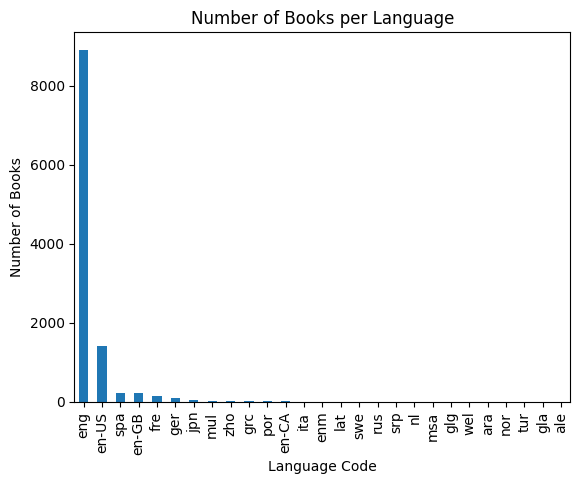

In [34]:
# Number of Books per Language
books_per_language = data['language_code'].value_counts()

# Plotting the results
books_per_language.plot(kind='bar', title='Number of Books per Language')
plt.xlabel('Language Code')
plt.ylabel('Number of Books')
plt.show()


We can see that the majority of our books are in English

#### Publisher

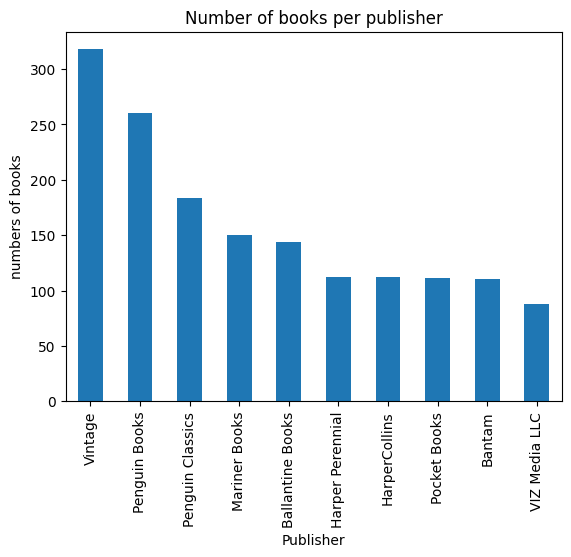

In [35]:
# Number of books per publisher
books_per_publisher = data['publisher'].value_counts().head(10)  # Show the 10 most frequent publishers

# Plotting the results
books_per_publisher.plot(kind='bar', title='Number of books per publisher')
plt.xlabel('Publisher')
plt.ylabel('numbers of books')
plt.show()

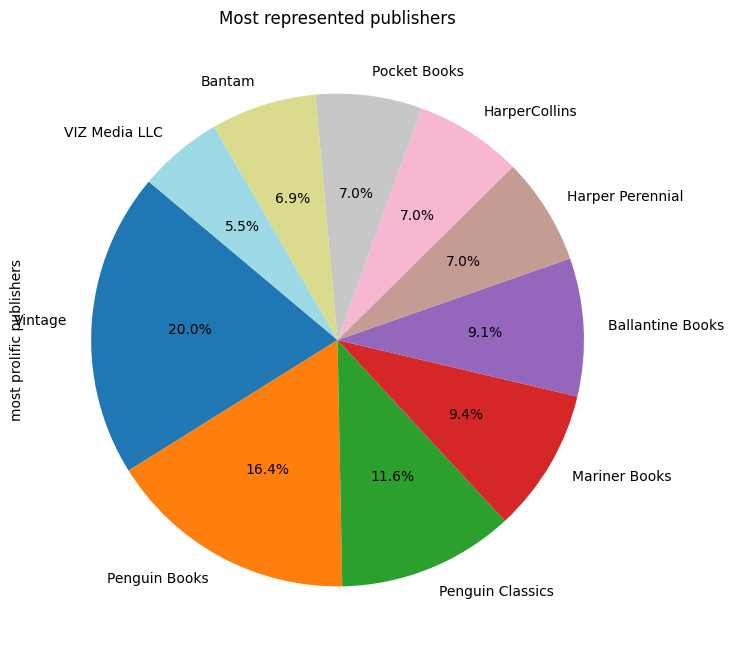

In [81]:
popular_pulishers = data['publisher'].value_counts().head(10)
plt.figure(figsize=(10, 8))
popular_pulishers.plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('Most represented publishers')
plt.ylabel('most prolific publishers')
plt.show()

#### Authors

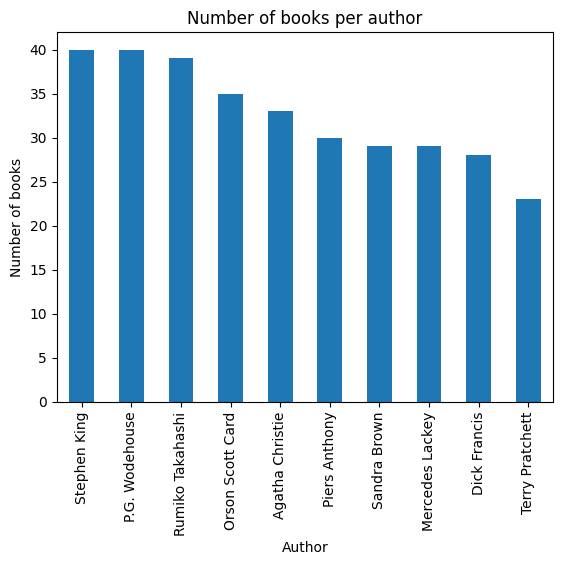

In [84]:
# Number of books per author
books_per_author = data['authors'].value_counts().head(10)  # Display the 10 most prolific authors

# Plotting the results
books_per_author.plot(kind='bar', title='Number of books per author')
plt.xlabel('Author')
plt.ylabel('Number of books')
plt.show()


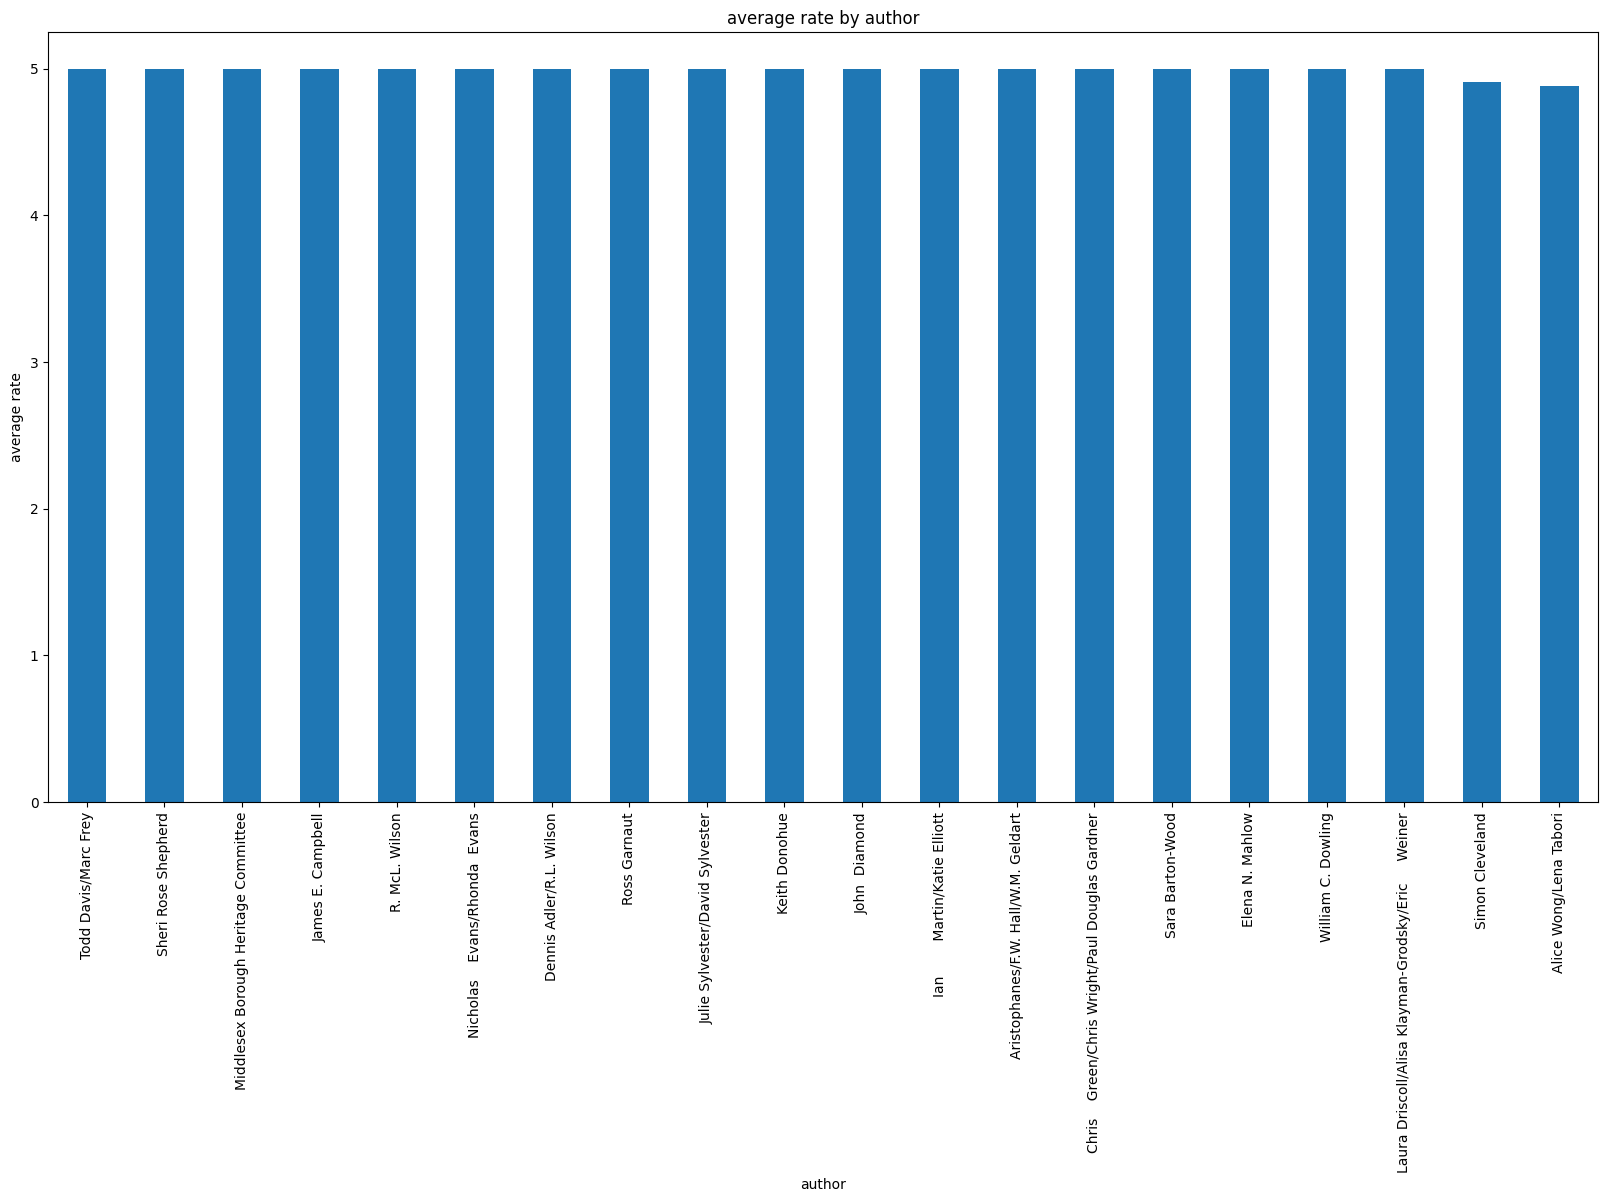

In [49]:
# average rate of the best 20 authors
auteurs_moyenne_notes = data.groupby('authors')['average_rating'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(20, 10))
auteurs_moyenne_notes.plot(kind='bar')
plt.title('average rate by author')
plt.xlabel('author')
plt.ylabel('average rate')
plt.xticks(rotation=90)
plt.show()

#### Publication Year

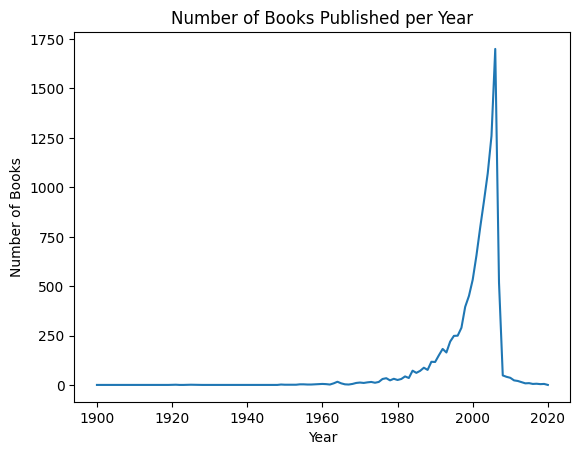

In [63]:
data['publication_year'] = pd.to_datetime(data['publication_date'], errors='coerce').dt.year

# Number of books published per year
books_per_year = data['publication_year'].value_counts().sort_index()

# Plotting the results
books_per_year.plot(kind='line', title='Number of Books Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()


A good number of the books are recent between 1990 and 2010 approximativaly

#### Average rate

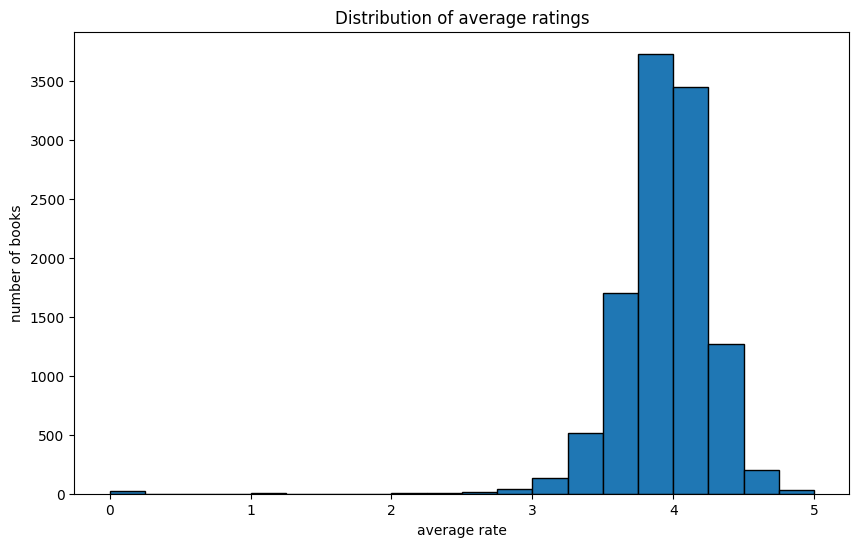

In [43]:
plt.figure(figsize=(10, 6))
data['average_rating'].hist(bins=20, edgecolor='black')
plt.title('Distribution of average ratings')
plt.xlabel('average rate')
plt.ylabel('number of books')
plt.grid(False)
plt.show()

We can see that our dataset is skewed to the right and have mosly high rated books

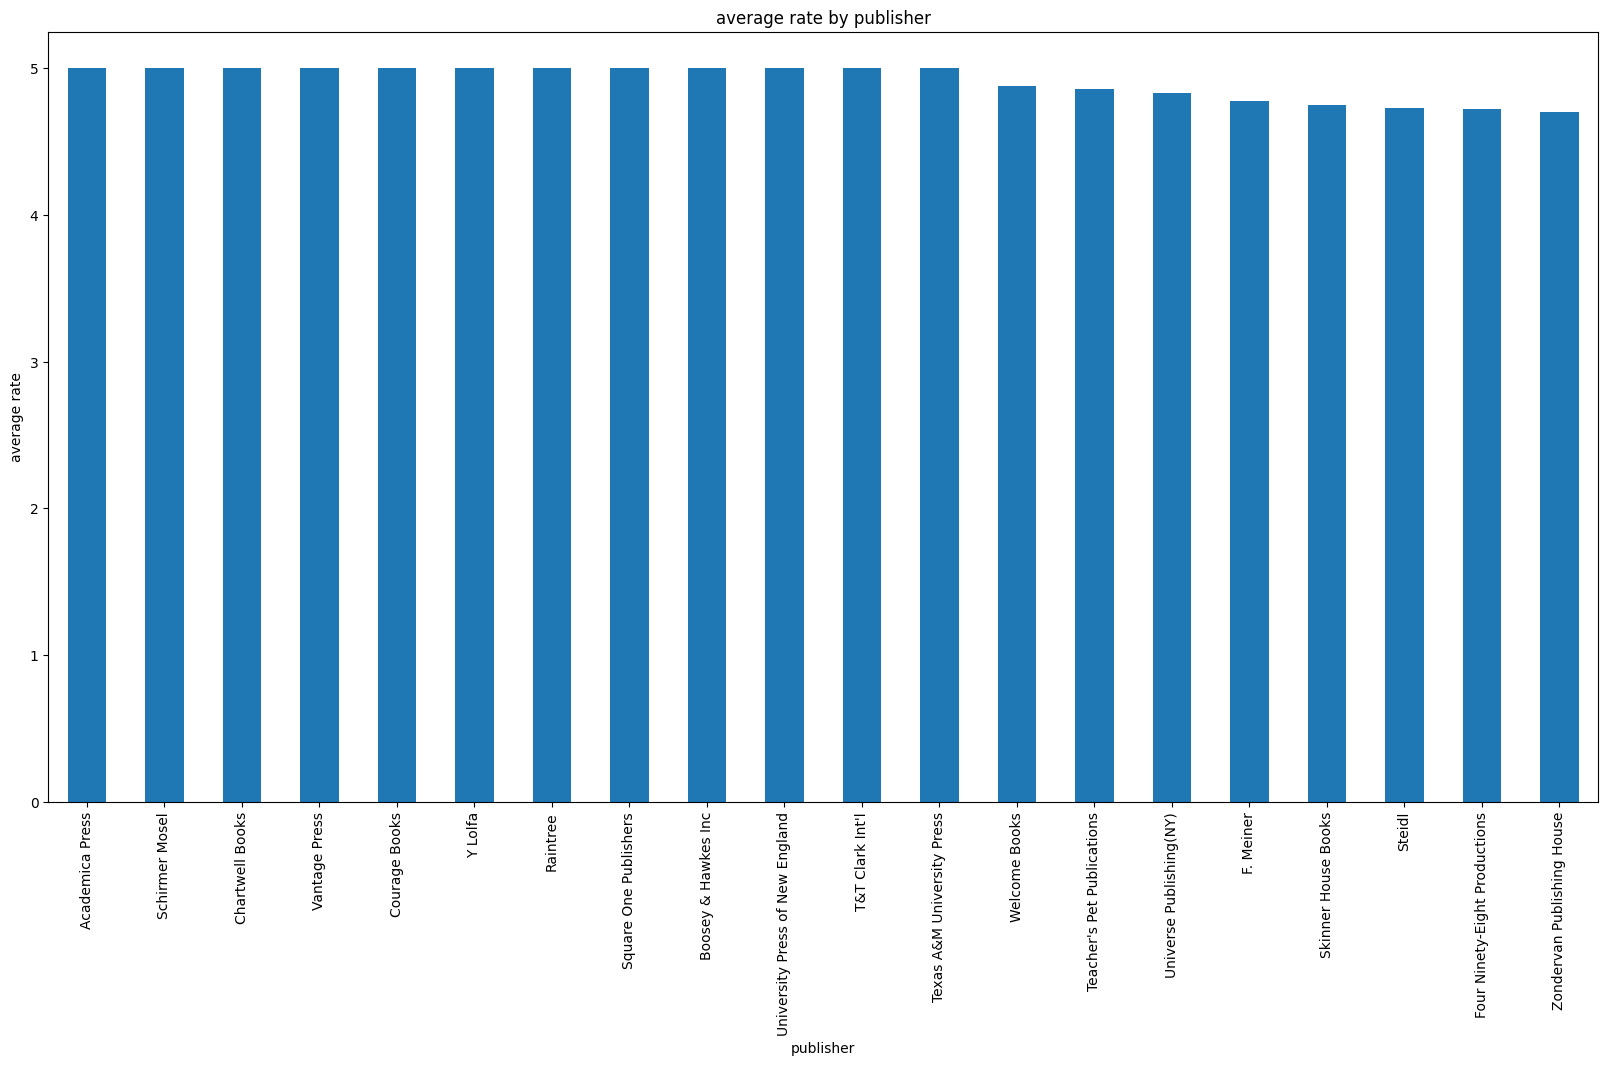

In [52]:
# Calculer la moyenne des notes pour les éditeurs les plus prolifiques
editeurs_moyenne_notes = data.groupby('publisher')['average_rating'].mean().sort_values(ascending=False).head(20)


plt.figure(figsize=(20, 10))
editeurs_moyenne_notes.plot(kind='bar')
plt.title('average rate by publisher')
plt.xlabel('publisher')
plt.ylabel('average rate')
plt.xticks(rotation=90)
plt.show()

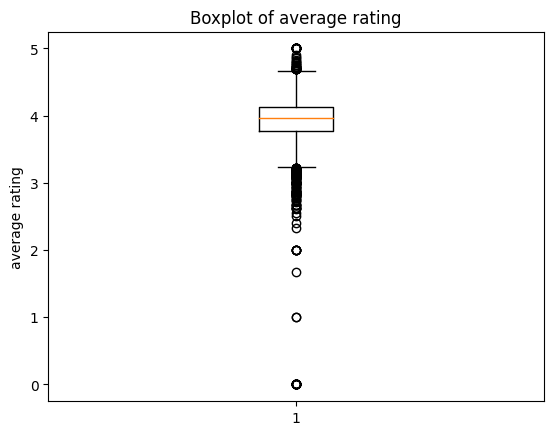

In [79]:
plt.boxplot(data["average_rating"])

plt.title('Boxplot of average rating')
plt.ylabel('average rating')

plt.show()

#### correlation between numerical columns and average rating

In [39]:
data[["average_rating","  num_pages","ratings_count","text_reviews_count"]].corr()

,average_rating,num_pages,ratings_count,text_reviews_count
average_rating,1.000000,0.150943,0.038202,0.033729
num_pages,0.150943,1.000000,0.034340,0.036983
ratings_count,0.038202,0.034340,1.000000,0.865977
text_reviews_count,0.033729,0.036983,0.865977,1.000000


We can see that num_pages have the higher correlation with average_rating

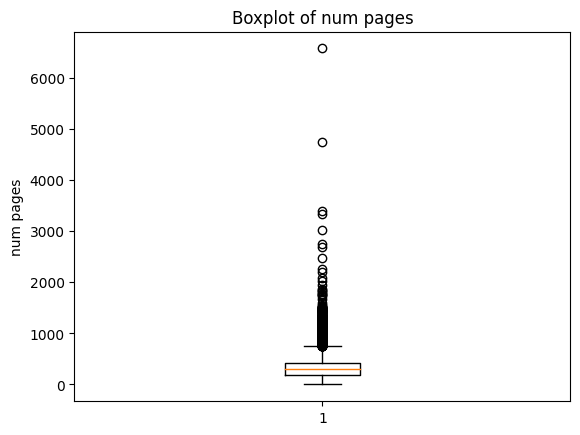

In [77]:
plt.boxplot(data["  num_pages"])

plt.title('Boxplot of num_pages')
plt.ylabel('Publication Year')

plt.show()

In [40]:
data.loc[5000:6000, ["title","publication_date"]]

,title,publication_date
5000,Uncle Fred in the Springtime (Blandings Castle...,4/15/2004
5001,The Best of Wodehouse: An Anthology,6/19/2007
5002,The World of Mr. Mulliner,7/29/1999
5003,Cocktail Time,10/21/2004
5004,The Waste Lands (The Dark Tower #3),1/1/1993
...,...,...
5996,The Origin of Species,5/1/2004
5997,The Origin of Satan: How Christians Demonized ...,4/30/1996
5998,Discourse on the Origin of Inequality,6/4/2004
5999,On the Origins of War and the Preservation of ...,1/1/1996


After checking on the internet some of these books we notice that the publication date is not always correct